### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns

In [238]:
df = pd.read_csv('AXISBANK.csv')

In [239]:
df.isna().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [240]:
df.dropna(inplace=True)

In [241]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-29,536.950012,560.900024,535.500000,552.900024,537.454590,1193519.0
1,2015-04-30,562.000000,582.000000,559.049988,567.849976,551.986877,1671228.0
2,2015-05-04,571.000000,576.500000,563.400024,568.299988,552.424316,500336.0
3,2015-05-05,570.000000,574.299988,562.650024,565.599976,549.799805,617444.0
4,2015-05-06,564.000000,565.599976,540.900024,543.650024,528.463013,919003.0


In [242]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1225,2020-04-22,419.799988,434.399994,410.549988,431.200012,431.200012,1056967.0
1226,2020-04-23,437.000000,440.000000,426.000000,429.700012,429.700012,1327110.0
1227,2020-04-24,418.450012,419.450012,401.450012,404.100006,404.100006,1075649.0
1228,2020-04-27,414.200012,429.500000,409.600006,427.299988,427.299988,1004719.0
1229,2020-04-28,439.000000,458.250000,435.399994,455.549988,455.549988,1503750.0


In [243]:
df1=df.reset_index()['Close']

In [244]:
df1

0       552.900024
1       567.849976
2       568.299988
3       565.599976
4       543.650024
           ...    
1224    431.200012
1225    429.700012
1226    404.100006
1227    427.299988
1228    455.549988
Name: Close, Length: 1229, dtype: float64

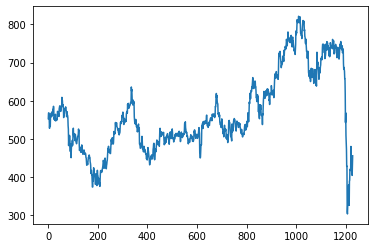

In [245]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [246]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [247]:
import numpy as np

In [248]:
df1

0       552.900024
1       567.849976
2       568.299988
3       565.599976
4       543.650024
           ...    
1224    431.200012
1225    429.700012
1226    404.100006
1227    427.299988
1228    455.549988
Name: Close, Length: 1229, dtype: float64

In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [250]:
print(df1)

[[0.4819103 ]
 [0.51075729]
 [0.51162562]
 ...
 [0.19479017]
 [0.23955617]
 [0.29406654]]


In [251]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [252]:
training_size,test_size

(860, 369)

In [253]:
test_data

array([[0.49773269],
       [0.50149538],
       [0.5021708 ],
       [0.49561021],
       [0.45190539],
       [0.50699472],
       [0.50062705],
       [0.53786785],
       [0.57732748],
       [0.59199228],
       [0.61968157],
       [0.58745772],
       [0.58649294],
       [0.59710557],
       [0.58475639],
       [0.608683  ],
       [0.59739506],
       [0.62228656],
       [0.60810415],
       [0.60202607],
       [0.59758797],
       [0.62363717],
       [0.60038587],
       [0.63222378],
       [0.62141823],
       [0.6261457 ],
       [0.63135545],
       [0.62247947],
       [0.62064636],
       [0.61649785],
       [0.60086826],
       [0.57346834],
       [0.57906414],
       [0.55349733],
       [0.58099371],
       [0.61013018],
       [0.60781478],
       [0.60887602],
       [0.60607812],
       [0.61090205],
       [0.64891461],
       [0.63646886],
       [0.61350692],
       [0.60135065],
       [0.60530625],
       [0.60656052],
       [0.62151469],
       [0.610

In [254]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [255]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [256]:
print(X_train.shape), print(y_train.shape)

(759, 100)
(759,)


(None, None)

In [257]:
print(X_test.shape), print(ytest.shape)

(268, 100)
(268,)


(None, None)

In [258]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [259]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [260]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [261]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [262]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Train on 759 samples, validate on 268 samples
Epoch 1/10
759/759 [==============================] - 13s 17ms/sample - loss: 0.0445 - val_loss: 0.0853
Epoch 2/10
759/759 [==============================] - 3s 5ms/sample - loss: 0.0076 - val_loss: 0.0210
Epoch 3/10
759/759 [==============================] - 3s 5ms/sample - loss: 0.0040 - val_loss: 0.0514
Epoch 4/10
759/759 [==============================] - 3s 4ms/sample - loss: 0.0033 - val_loss: 0.0278
Epoch 5/10
759/759 [==============================] - 3s 4ms/sample - loss: 0.0028 - val_loss: 0.0261
Epoch 6/10
759/759 [==============================] - 3s 4ms/sample - loss: 0.0025 - val_loss: 0.0211
Epoch 7/10
759/759 [==============================] - 3s 4ms/sample - loss: 0.0023 - val_loss: 0.0184
Epoch 8/10
759/759 [==============================] - 3s 5ms/sample - loss: 0.0022 - val_loss: 0.0153
Epoch 9/10
759/759 [==============================] - 3s 5ms/sample - loss: 0.0021 - val_loss: 0.0140
Epoch 10/10
759/759 [=============

In [263]:
import tensorflow as tf

In [264]:
tf.__version__

'2.0.0'

In [265]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [266]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [267]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

515.298161744194

In [268]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

702.605482926181

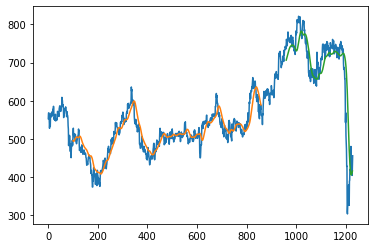

In [269]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [270]:
len(test_data)

369

In [271]:
x_input=test_data[269:].reshape(1,-1)
x_input.shape


(1, 100)

In [272]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [273]:
temp_input

[0.8510371297035911,
 0.8299083089295721,
 0.8424505175619575,
 0.8226724193339651,
 0.7996140280011174,
 0.8273998903579417,
 0.795368949616848,
 0.7974915466960996,
 0.8074287656095264,
 0.866087756907607,
 0.8566328148596537,
 0.8536420036483162,
 0.8467920513193216,
 0.848239229238443,
 0.8423540621888627,
 0.849782862530659,
 0.8438012401079841,
 0.8355041098598682,
 0.8828750439242617,
 0.8703328352918763,
 0.8699468980252639,
 0.860106134484932,
 0.8762180023414566,
 0.8485287111319607,
 0.8093583361683548,
 0.8153400743652633,
 0.8134105038064349,
 0.8492040145178573,
 0.8429329102016646,
 0.8380125284314986,
 0.8576941712863962,
 0.8547998154481534,
 0.8377230465379809,
 0.8425469729350522,
 0.8173661002971867,
 0.79999996526773,
 0.7903521124735874,
 0.8097442734349672,
 0.8377230465379809,
 0.8429329102016646,
 0.8373371092713685,
 0.8339603607934184,
 0.8261456231850096,
 0.8223829374404473,
 0.7833091336241697,
 0.7945007354847621,
 0.8123492631539259,
 0.837144198525179,


In [274]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.22779933]
101
1 day input [0.82990831 0.84245052 0.82267242 0.79961403 0.82739989 0.79536895
 0.79749155 0.80742877 0.86608776 0.85663281 0.853642   0.84679205
 0.84823923 0.84235406 0.84978286 0.84380124 0.83550411 0.88287504
 0.87033284 0.8699469  0.86010613 0.876218   0.84852871 0.80935834
 0.81534007 0.8134105  0.84920401 0.84293291 0.83801253 0.85769417
 0.85479982 0.83772305 0.84254697 0.8173661  0.79999997 0.79035211
 0.80974427 0.83772305 0.84293291 0.83733711 0.83396036 0.82614562
 0.82238294 0.78330913 0.79450074 0.81234926 0.8371442  0.85836947
 0.84544133 0.86126383 0.87216595 0.85769417 0.8359865  0.83917022
 0.83019779 0.84524842 0.85055474 0.81553299 0.82151472 0.82315481
 0.83453932 0.75947898 0.73217551 0.74114806 0.73111427 0.72243121
 0.68451521 0.68451521 0.60897248 0.46251803 0.51143271 0.39758805
 0.35880367 0.32706221 0.2404245  0.24158226 0.01003379 0.
 0.0458273  0.07621804 0.10911725 0.12648338 0.14693679 0.10670529
 0.04331888 0.16526771 0.17009163 0.22527

9 day output [[0.25872576]]
10 day input [0.85663281 0.853642   0.84679205 0.84823923 0.84235406 0.84978286
 0.84380124 0.83550411 0.88287504 0.87033284 0.8699469  0.86010613
 0.876218   0.84852871 0.80935834 0.81534007 0.8134105  0.84920401
 0.84293291 0.83801253 0.85769417 0.85479982 0.83772305 0.84254697
 0.8173661  0.79999997 0.79035211 0.80974427 0.83772305 0.84293291
 0.83733711 0.83396036 0.82614562 0.82238294 0.78330913 0.79450074
 0.81234926 0.8371442  0.85836947 0.84544133 0.86126383 0.87216595
 0.85769417 0.8359865  0.83917022 0.83019779 0.84524842 0.85055474
 0.81553299 0.82151472 0.82315481 0.83453932 0.75947898 0.73217551
 0.74114806 0.73111427 0.72243121 0.68451521 0.68451521 0.60897248
 0.46251803 0.51143271 0.39758805 0.35880367 0.32706221 0.2404245
 0.24158226 0.01003379 0.         0.0458273  0.07621804 0.10911725
 0.12648338 0.14693679 0.10670529 0.04331888 0.16526771 0.17009163
 0.22527736 0.22431258 0.21987459 0.23154847 0.34134102 0.29406654
 0.22720693 0.24708154

18 day output [[0.27425453]]
19 day input [0.87033284 0.8699469  0.86010613 0.876218   0.84852871 0.80935834
 0.81534007 0.8134105  0.84920401 0.84293291 0.83801253 0.85769417
 0.85479982 0.83772305 0.84254697 0.8173661  0.79999997 0.79035211
 0.80974427 0.83772305 0.84293291 0.83733711 0.83396036 0.82614562
 0.82238294 0.78330913 0.79450074 0.81234926 0.8371442  0.85836947
 0.84544133 0.86126383 0.87216595 0.85769417 0.8359865  0.83917022
 0.83019779 0.84524842 0.85055474 0.81553299 0.82151472 0.82315481
 0.83453932 0.75947898 0.73217551 0.74114806 0.73111427 0.72243121
 0.68451521 0.68451521 0.60897248 0.46251803 0.51143271 0.39758805
 0.35880367 0.32706221 0.2404245  0.24158226 0.01003379 0.
 0.0458273  0.07621804 0.10911725 0.12648338 0.14693679 0.10670529
 0.04331888 0.16526771 0.17009163 0.22527736 0.22431258 0.21987459
 0.23154847 0.34134102 0.29406654 0.22720693 0.24708154 0.24418719
 0.19479017 0.23955617 0.29406654 0.22779933 0.23307244 0.23786677
 0.24211359 0.24582541 0.249

27 day output [[0.28833783]]
28 day input [0.84293291 0.83801253 0.85769417 0.85479982 0.83772305 0.84254697
 0.8173661  0.79999997 0.79035211 0.80974427 0.83772305 0.84293291
 0.83733711 0.83396036 0.82614562 0.82238294 0.78330913 0.79450074
 0.81234926 0.8371442  0.85836947 0.84544133 0.86126383 0.87216595
 0.85769417 0.8359865  0.83917022 0.83019779 0.84524842 0.85055474
 0.81553299 0.82151472 0.82315481 0.83453932 0.75947898 0.73217551
 0.74114806 0.73111427 0.72243121 0.68451521 0.68451521 0.60897248
 0.46251803 0.51143271 0.39758805 0.35880367 0.32706221 0.2404245
 0.24158226 0.01003379 0.         0.0458273  0.07621804 0.10911725
 0.12648338 0.14693679 0.10670529 0.04331888 0.16526771 0.17009163
 0.22527736 0.22431258 0.21987459 0.23154847 0.34134102 0.29406654
 0.22720693 0.24708154 0.24418719 0.19479017 0.23955617 0.29406654
 0.22779933 0.23307244 0.23786677 0.24211359 0.24582541 0.24905916
 0.25189048 0.25439841 0.25665596 0.25872576 0.26065898 0.26249495
 0.26426333 0.2659850

In [275]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [276]:
import matplotlib.pyplot as plt

In [277]:
len(df1)

1229

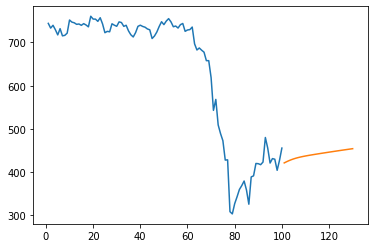

In [283]:
plt.plot(day_new,scaler.inverse_transform(df1[1129:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

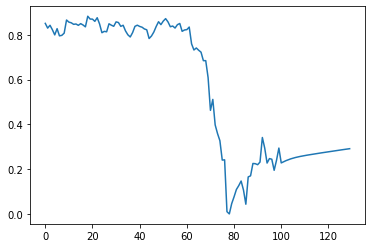

In [285]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1129:])

In [286]:
df3=scaler.inverse_transform(df3).tolist()

AttributeError: 'Line2D' object has no property 'figsize'

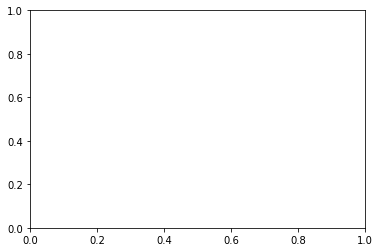

In [291]:
plt.plot(df3,figsize=(15,5))